In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath('../scripts'))
from utils import non_missing_values_table as nmv
from utils import * 
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import euclidean_distances

In [8]:
engagement_df = pd.read_csv('../data/engagement_metrics.csv')
experience_df = pd.read_csv('../data/experience_metrics.csv')
pd.set_option('display.max_columns', None)

In [9]:
engagement_df.head()

,MSISDN/Number,sessions_frequency,total_duration,total_traffic,engagement_cluster
0,3.360100e+10,1,116720.0,8.786906e+08,0
1,3.360100e+10,1,181230.0,1.568596e+08,0
2,3.360100e+10,1,134969.0,5.959665e+08,0
3,3.360101e+10,1,49878.0,4.223207e+08,0
4,3.360101e+10,2,37104.0,1.457411e+09,1


In [10]:
experience_df.head()

,MSISDN/Number,avg_tcp_retransmission_bytes,avg_rtt_ms,avg_throughput_kbps,experience_cluster
0,3.360100e+10,2.100477e+07,46.0,37.0,0
1,3.360100e+10,2.100477e+07,30.0,48.0,0
2,3.360100e+10,2.100477e+07,45.0,48.0,0
3,3.360101e+10,1.066000e+03,69.0,204.0,1
4,3.360101e+10,1.517720e+07,57.0,20197.5,0


In [11]:
engagement_df.shape

(106469, 5)

In [12]:
experience_df.shape 

(106469, 5)

In [13]:
# Merge dataframes
df = pd.merge(engagement_df, experience_df, on='MSISDN/Number')

In [14]:
df.shape

(106469, 9)

In [15]:
df.head()

,MSISDN/Number,sessions_frequency,total_duration,total_traffic,engagement_cluster,avg_tcp_retransmission_bytes,avg_rtt_ms,avg_throughput_kbps,experience_cluster
0,3.360100e+10,1,116720.0,8.786906e+08,0,2.100477e+07,46.0,37.0,0
1,3.360100e+10,1,181230.0,1.568596e+08,0,2.100477e+07,30.0,48.0,0
2,3.360100e+10,1,134969.0,5.959665e+08,0,2.100477e+07,45.0,48.0,0
3,3.360101e+10,1,49878.0,4.223207e+08,0,1.066000e+03,69.0,204.0,1
4,3.360101e+10,2,37104.0,1.457411e+09,1,1.517720e+07,57.0,20197.5,0


- **Engagement cluster Summary**

In [16]:


# For Engagement Clusters
engagement_summary = df.groupby('engagement_cluster')[['total_duration', 'total_traffic','sessions_frequency' ]].mean()
print("Engagement Cluster Summary:\n")
display(engagement_summary)


Engagement Cluster Summary:



,total_duration,total_traffic,sessions_frequency
engagement_cluster,,,
0,102734.861455,4.953830e+08,1.028561
1,211710.163891,1.114199e+09,2.178610
2,617360.549919,2.260354e+09,4.358654


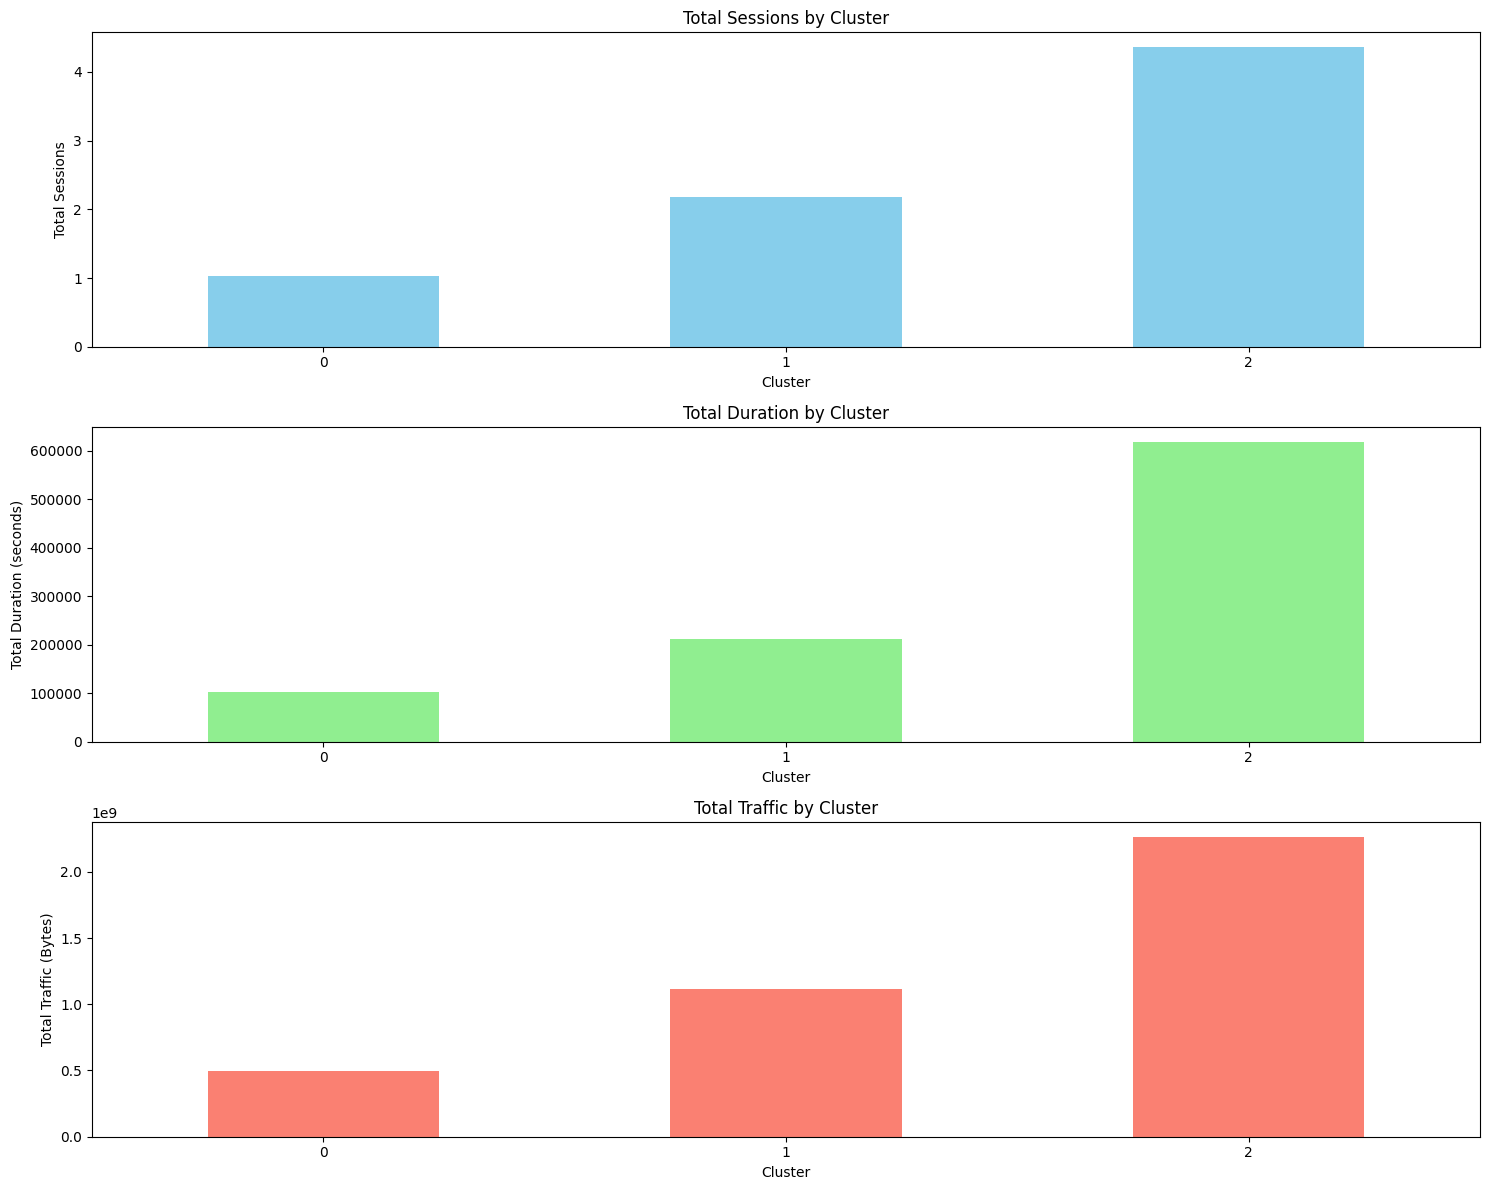

In [17]:
# Plotting bar charts
plt.figure(figsize=(15, 12))

# Total Sessions
plt.subplot(3, 1, 1)
engagement_summary['sessions_frequency'].plot(kind='bar', color='skyblue')
plt.title('Total Sessions by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Sessions')
plt.xticks(rotation=0)

# Total Duration
plt.subplot(3, 1, 2)
engagement_summary['total_duration'].plot(kind='bar', color='lightgreen')
plt.title('Total Duration by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Duration (seconds)')
plt.xticks(rotation=0)

# Total Traffic
plt.subplot(3, 1, 3)
engagement_summary['total_traffic'].plot(kind='bar', color='salmon')
plt.title('Total Traffic by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Traffic (Bytes)')
plt.xticks(rotation=0)



plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

- From what we see from the summary and graphs we can decide which cluster has the least engaged Cluster.
- The least engaged cluster is the cluster which has :
    * Low total session 
    * Low total duration 
    * Low total traffic 
- Based on the above metrics comparing the three clusters **Cluster 0** has the worst experience cluster

- **Experience Summary Cluster** 

In [18]:
# For Experience Clusters
experience_summary = df.groupby('experience_cluster')[['avg_tcp_retransmission_bytes', 'avg_rtt_ms', 'avg_throughput_kbps']].mean()
print("Experience Cluster Summary:\n")
display(experience_summary)

Experience Cluster Summary:



,avg_tcp_retransmission_bytes,avg_rtt_ms,avg_throughput_kbps
experience_cluster,,,
0,2.074507e+07,43.650970,2268.569649
1,4.427586e+06,56.499554,31549.286632
2,7.553608e+06,217.621380,10685.561154


- Experience cluster Graph 

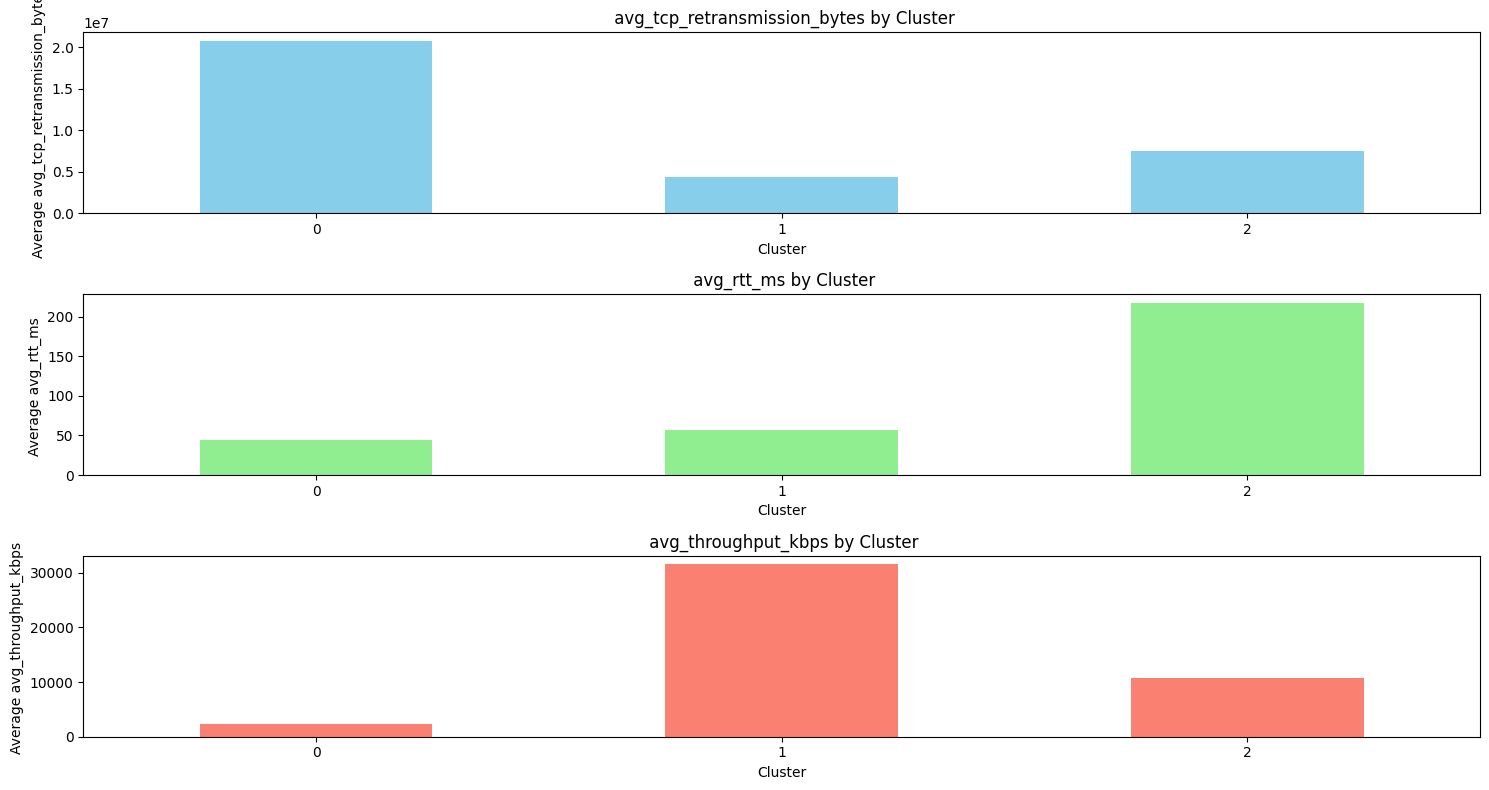

In [19]:
# Plotting bar charts
plt.figure(figsize=(15, 8))

# Total Sessions
plt.subplot(3, 1, 1)
experience_summary['avg_tcp_retransmission_bytes'].plot(kind='bar', color='skyblue')
plt.title(' avg_tcp_retransmission_bytes by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average avg_tcp_retransmission_bytes')
plt.xticks(rotation=0)

# Total Duration
plt.subplot(3, 1, 2)
experience_summary['avg_rtt_ms'].plot(kind='bar', color='lightgreen')
plt.title(' avg_rtt_ms by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average avg_rtt_ms ')
plt.xticks(rotation=0)

# Total Traffic
plt.subplot(3, 1, 3)
experience_summary['avg_throughput_kbps'].plot(kind='bar', color='salmon')
plt.title(' avg_throughput_kbps by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average avg_throughput_kbps ')
plt.xticks(rotation=0)



plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

- From what we see from the summary and graphs we can decide which cluster has the Worst Experience Cluster.
- The worst experinece cluster is the cluster which has :
    * High Average TCP retransmission 
    * High average RTT
    * Low average throughput 
- Based on the above metrics comparing the three clusters **Cluster 0** has the worst experience cluster

In [23]:
# Define the clusters 
less_engaged_cluster = df[df['engagement_cluster'] == 2][['total_duration', 'total_traffic', 'sessions_frequency']].mean()
worst_experience_cluster = df[df['experience_cluster'] == 1][['avg_tcp_retransmission_bytes', 'avg_rtt_ms', 'avg_throughput_kbps']].mean()

In [24]:
# Convert cluster means to DataFrame for distance calculation
less_engaged_cluster = less_engaged_cluster.values.reshape(1, -1)
worst_experience_cluster = worst_experience_cluster.values.reshape(1, -1)

# Calculate engagement scores using pairwise distances
df['engagement_score'] = euclidean_distances(df[['total_duration', 'total_traffic','sessions_frequency']], less_engaged_cluster).flatten()

# Calculate experience scores using pairwise distances
df['experience_score'] = euclidean_distances(df[['avg_tcp_retransmission_bytes', 'avg_rtt_ms', 'avg_throughput_kbps']], worst_experience_cluster).flatten()

# Task 2: Calculate Satisfaction Score
df['satisfaction_score'] = (df['engagement_score'] + df['experience_score']) / 2

In [29]:
df.head()

,MSISDN/Number,sessions_frequency,total_duration,total_traffic,engagement_cluster,avg_tcp_retransmission_bytes,avg_rtt_ms,avg_throughput_kbps,experience_cluster,engagement_score,experience_score,satisfaction_score,eng_exp_cluster
0,3.360100e+10,1,116720.0,8.786906e+08,0,2.100477e+07,46.0,37.0,0,1.381664e+09,1.657722e+07,6.991205e+08,0
1,3.360100e+10,1,181230.0,1.568596e+08,0,2.100477e+07,30.0,48.0,0,2.103495e+09,1.657722e+07,1.060036e+09,0
2,3.360100e+10,1,134969.0,5.959665e+08,0,2.100477e+07,45.0,48.0,0,1.664388e+09,1.657722e+07,8.404825e+08,0
3,3.360101e+10,1,49878.0,4.223207e+08,0,1.066000e+03,69.0,204.0,1,1.838034e+09,4.426631e+06,9.212302e+08,0
4,3.360101e+10,2,37104.0,1.457411e+09,1,1.517720e+07,57.0,20197.5,0,8.029436e+08,1.074962e+07,4.068466e+08,1


In [27]:
top_satisfied_customers = df.nlargest(10, 'satisfaction_score')
print("\nTop 10 Satisfied Customers:\n", top_satisfied_customers[['MSISDN/Number', 'satisfaction_score']])


Top 10 Satisfied Customers:
        MSISDN/Number  satisfaction_score
6404    3.361489e+10        3.294528e+09
92584   3.376054e+10        3.133142e+09
13123   3.362578e+10        3.124843e+09
13467   3.362632e+10        2.859619e+09
76077   3.367588e+10        2.818537e+09
36909   3.365973e+10        2.723173e+09
62804   3.366646e+10        2.527623e+09
92239   3.376041e+10        2.438443e+09
57032   3.366471e+10        2.308601e+09
86138   3.369879e+10        2.144400e+09


In [28]:
#  K-means on engagement & experience scores
eng_exp_scores = df[['engagement_score', 'experience_score']]
kmeans_eng_exp = KMeans(n_clusters=2, init='k-means++')
df['eng_exp_cluster'] = kmeans_eng_exp.fit_predict(eng_exp_scores)

In [35]:
#  Aggregate average satisfaction & experience scores per cluster
avg_scores_per_cluster = df.groupby('eng_exp_cluster').agg(
    users=('MSISDN/Number', 'nunique'),
    avg_satisfaction=('satisfaction_score', 'mean'),
    avg_experience=('experience_score', 'mean')
).reset_index()

In [36]:
avg_scores_per_cluster.head()

,eng_exp_cluster,users,avg_satisfaction,avg_experience
0,0,88283,8.761308e+08,1.256806e+07
1,1,18186,4.272349e+08,1.065532e+07


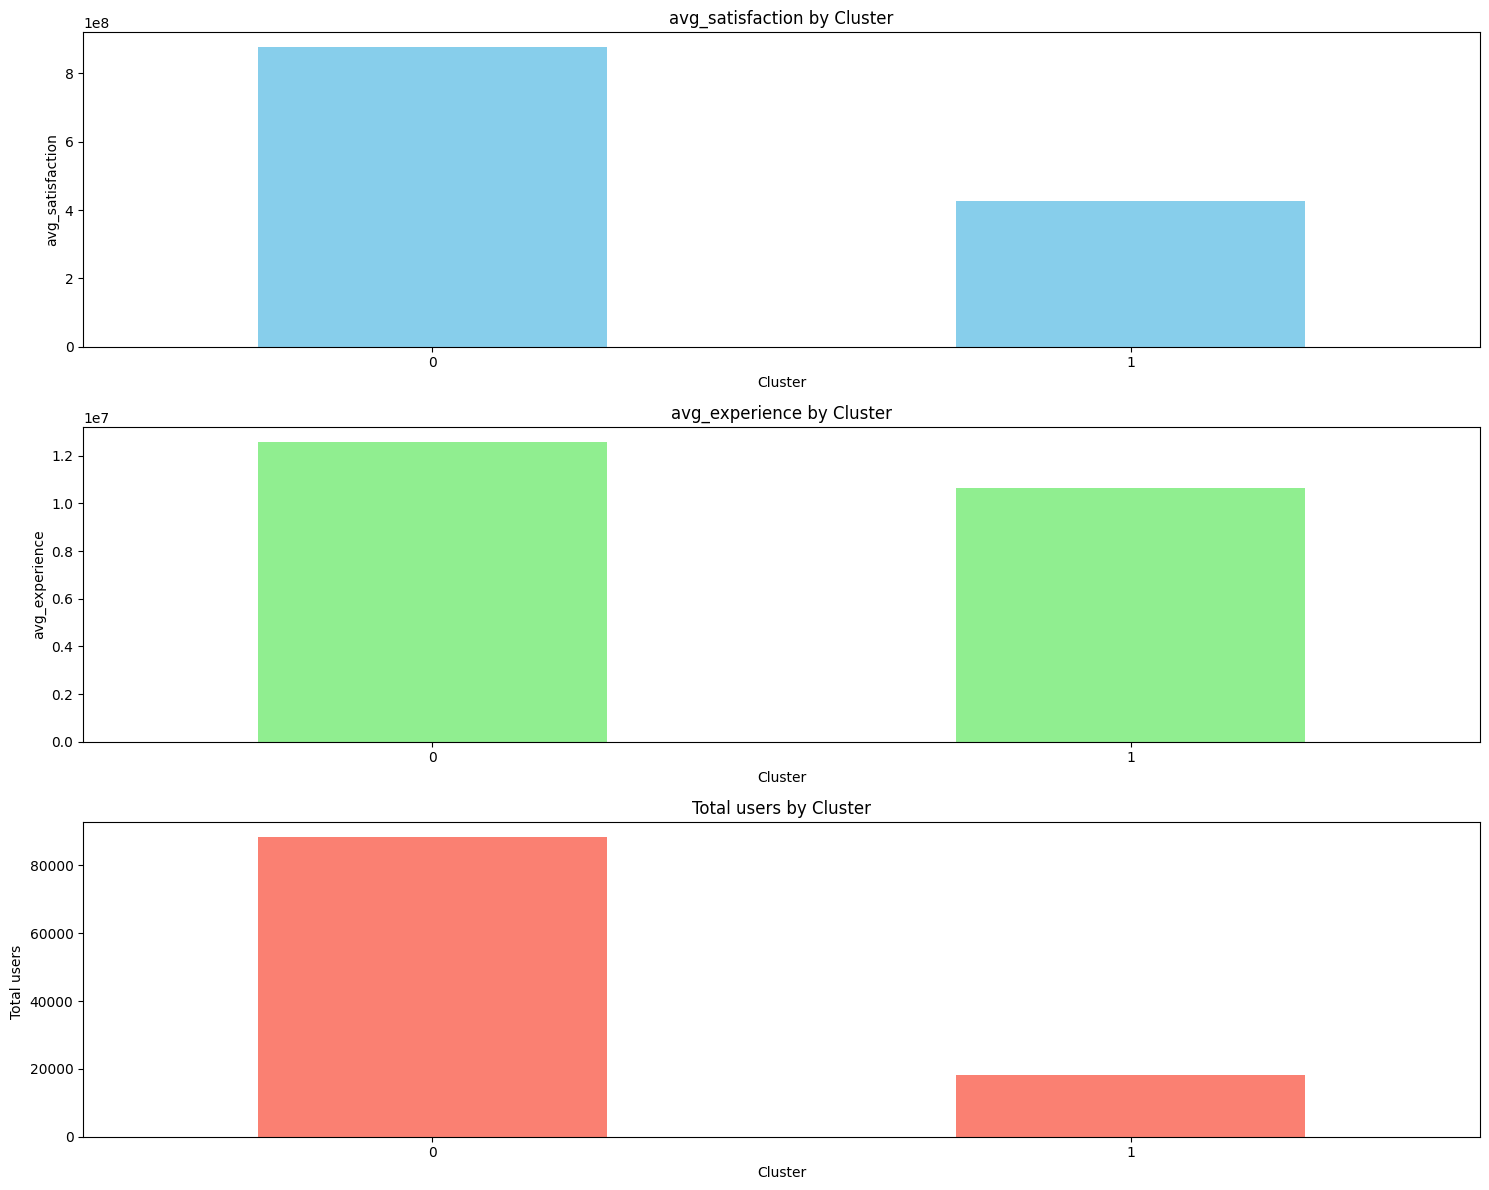

In [37]:
# Plotting bar charts
plt.figure(figsize=(15, 12))

# Total Sessions
plt.subplot(3, 1, 1)
avg_scores_per_cluster['avg_satisfaction'].plot(kind='bar', color='skyblue')
plt.title('avg_satisfaction by Cluster')
plt.xlabel('Cluster')
plt.ylabel('avg_satisfaction')
plt.xticks(rotation=0)

# Total Duration
plt.subplot(3, 1, 2)
avg_scores_per_cluster['avg_experience'].plot(kind='bar', color='lightgreen')
plt.title('avg_experience by Cluster')
plt.xlabel('Cluster')
plt.ylabel('avg_experience')
plt.xticks(rotation=0)

# Total Traffic
plt.subplot(3, 1, 3)
avg_scores_per_cluster['users'].plot(kind='bar', color='salmon')
plt.title('Total users by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total users ')
plt.xticks(rotation=0)



plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()